# Le modèle SIR en épidémiologie

**1. Représenter les données sur un graphe et les commenter.**

   Time (days)  Deaths
0            7      14
1           14      28
2           21      50
3           28      66
4           35     156


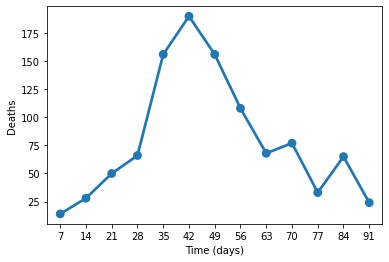

In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('Data_HK.csv')
print(data.head())
ax = sns.pointplot(x="Time (days)", y="Deaths", data=data)

**2. Selon les hypothèses que nous avons fait, comment pensez-vous que les trois population devraient varier dans le temps ? Dessinez (à la main) ce à quoi vous pensez que ressemble le graphique de chacune de ces fonctions.**

Solution sur papier/tableau.

**3.Expliquez pourquoi, à chaque instant $t$, $s(t) + i(t) + r(t) = 1$.**

Etant donné que nous avons supposé, par comodité, que la population est fixe pendant l'épidémie et égale à $N$, nous avons à tout temps $t$ : $S(t) + I(t) + R(t) = N$, ce qui implique le résultat en divisant par $N$.

**4. Expliquer comment chaque composante de l'équation (1) découle du texte précédent. En particulier: pourquoi le signe "moins" ? Pourquoi le facteur $I(t)$ ?**

Le signe "-" indique un "départ" à partir de ce compartiment. En particulier nous avons supposé que nous n'avons pas de nouvelles personnes qui viennent s'ajouter au group sensible. A chaque instant $t$, chaque personne déjà infecté peut infecter des nouvelles personnes sensibles: $\beta s(t)$ et la fraction de nouvelles personnes sensibles qui entrent en contact avec chaque personne infécté chaque jour.

**5. À partir de (1), dérver l'équation pour $s(t)$.**

$\dot{s}(t)=-\beta s(t)i(t)$

**6. Expliquer pourquoi $\dot{i}(t)+\dot{s}(t)+\dot{r}(t)=0$. Quelle hypothèse sur le modèle cela reflète-t-il ?**

Voir question 3 : pour tout $t$, $i(t)+s(t)+r(t)=0$, d'où le résultat en passant à la dérivée.

**7. Expliquer comment chaque composante de l'équation (2) découle des hypothèses faites. En particulier: pourquoi il y a deux termes ?**

A chaque $t$ dans le compartiment infécté les nouveaux inféctés à partir du compartiment sensible vient s'ajouter et une fraction $\gamma$ des inféctés se rétablie.

**8. Rétrouver l'équation décrivant la dynamique da la population rétablie.**

$\dot{r}(t)=\gamma i(t)$

**9. Qu'est ce'il se passe si on suppose $I(0)=0$ ?**

Dans ce cas, il n'y aura pas d'épidemie.

**10. Expliciter les conditions initiales pour $s(t), r(t), i(t)$, puis écrire formellement le système complet modèle-éxpériment.**

$i(0)=10/N$, $r(0)=0$, $s(0)=1-i(0)-r(0)$. Le système complet est constitué par les EDO qui décrivent la dynamique de $i(t),s(t),r(t)$, leur conditions initiales et l'observable $y(t)=\mathbf{h}(\mathbf{x}(t),\boldsymbol{\Psi})$, où $y(t)$ compte le nombre de déces dus à la grippe chaque jour, et $\mathbf{h}(\mathbf{x}(t),\boldsymbol{\Psi})$ et une fonction (pour l'instant inconnue) réliant l'observable aux paramètres du système et à ses prmètres inconnus:

\begin{equation}
\Sigma = \left\{\begin{array}{l}
EDO = \left\{\begin{array}{l}
\dot{s}(t)=-\beta s(t)i(t) \\
\dot{i}(t)=\beta s(t)i(t)-\gamma i(t)\\
\dot{r}(t)=\gamma i(t)\\
i(0)=10/N, r(0)=0, s(0)=1-i(0)-r(0)
\end{array}\right.\\
y(t)=\mathbf{h}(\mathbf{x}(t),\boldsymbol{\Psi})
\end{array}\right.
\end{equation}

**11. A la question 2. vous aviez essayez de déviner les dynamiques des trois populations considérées ici: est ce que cela corréspond aux graphique réalisé à partir du modèle ?**

0.9999987341772152 1.2658227848101265e-06 0.0


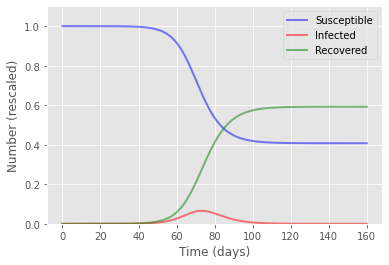

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Total population, N.
N = 7900000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 10, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Scaled variables
s0 = S0/N
i0 = I0/N
r0 = R0/N

print(s0,i0,r0)

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 0.33

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, beta, gamma):
    s, i, r = y
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return dsdt, didt, drdt

# Initial conditions vector
y0 = s0, i0, r0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, gamma))
s, i, r = ret.T

# Plot the data on three separate curves for s(t), i(t) and r(t)
plt.figure()
plt.plot(t, s, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, i, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, r, 'g', alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number (rescaled)')
plt.ylim(0,1.1)
plt.legend()
plt.show()


**12. Que pensez-vous du niveau d'infection relativement faible au plus fort de l'épidémie ? Pouvez-vous voir comment un faible pic d'infection peut néanmoins conduire plus de la moitié de la population à tomber malade ? Expliquez.**

Cela va dependre du nombre de personnes sensibles et de $\beta$. De plus, le compartiment $i$ est un compartiment "transitoire".

**13. Expérimentons d'abord les changements de $\beta$. Maintenez $\gamma$ fixé à $1/3$, et tracez le graphique de $i(t)$ avec plusieurs valeurs différentes de $\beta$ entre 0,5 et 2,0.  Décrivez comment ces changements affectent le graphique de $i(t)$.**

[0.5   0.875 1.25  1.625 2.   ]


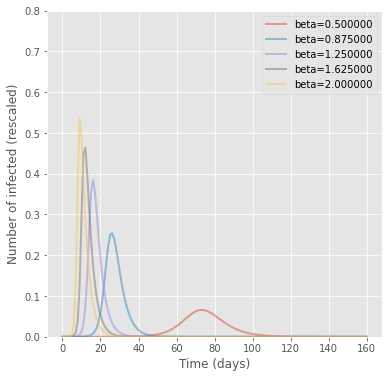

In [3]:
import numpy as np

Beta = np.linspace(0.5,2,5)
print(Beta)

fig = plt.figure(figsize=(6,6))
for betas in Beta:
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(betas, gamma))
  s, i, r = ret.T

  # Plot i(t)
  plt.plot(t, i, alpha=0.5, lw=2, label='beta=%f' % betas)

plt.xlabel('Time (days)')
plt.ylabel('Number of infected (rescaled)')
plt.ylim(0,0.8)
plt.legend()   
plt.show()

**14. Expliquez brièvement pourquoi les changements que vous observez sont raisonnables d'après votre compréhension intuitive du modèle épidémique.**

Le plus $\beta$ est grand, le plus qu'il y aura des contacts entre susceptibles et infectées: l'épidémie va donc procéder plus rapidement, avec un nombre de personnes inféctées plus importante.

**15. Nous allons faire la même chose avec le paramètre $\gamma$. Ramenez $\beta$ à $1/2$, et laissez varier $\gamma$ entre $0,1$ et $0,6$.  Décrivez les changements que vous voyez dans le graphique de $i(t)$.**

[0.1   0.225 0.35  0.475 0.6  ]


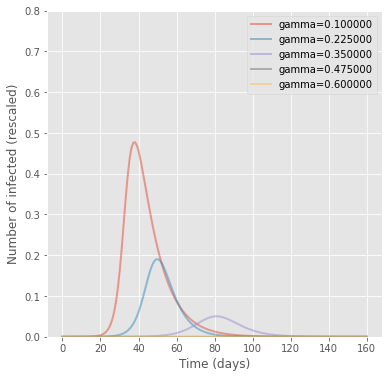

In [4]:
Gamma = np.linspace(0.1,0.6,5)
print(Gamma)

fig = plt.figure(figsize=(6,6))
for gammas in Gamma:
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(beta, gammas))
  s, i, r = ret.T

  # Plot i(t)
  plt.plot(t, i, alpha=0.5, lw=2, label='gamma=%f' % gammas)

plt.xlabel('Time (days)')
plt.ylabel('Number of infected (rescaled)')
plt.ylim(0,0.8)
plt.legend()   
plt.show()

**16. Il y a un changement dans le caractère du graphique de $i(t)$ près d'une extrémité de la plage suggérée (0,1 à 0,6) pour $\gamma$. Quel est ce changement, et où se produit-il ? Pouvez vous sous attendre à cela en regardant l'EDO pour $i(t)$ ?**

Si $\gamma$ est très grand, alors les inféctés passent dans le compartiment des personnes rétablies très rapidement sans avoir le temps de produire d'autres inféctions.

**Maintenant, comparons notre modèle avec les données, en supposant un taux de mortalité de 0.3$\%$ pour la grippe de Hong Kong. Répétez le graphique des données, ainsi que le graphique de $i(t)$ avec $\gamma = 1/3$ et $\beta = 6/10$.  Le modèle semble-t-il raisonnable ou non ? Expliquez votre conclusion.**

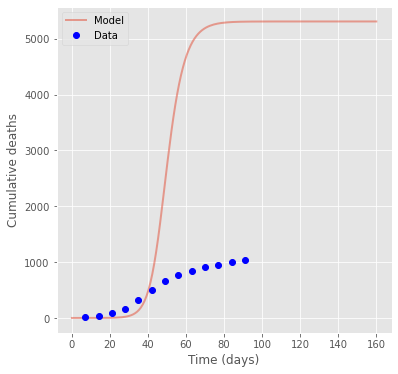

In [5]:
days = data["Time (days)"].to_list()
deaths = data["Deaths"].to_list()

# Cumulative deaths
import numpy as np
cumulative_deaths = np.cumsum(deaths)

# The SIR model differential equations (variables not rescaled).
# We include the death compartment M describing death people's dynamic, 
# and try what happen for a mortality rate of 0.3%
def Deriv(Y, t, beta, gamma, N):
    S, I, R, M = Y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = (gamma-0.0003) * I
    dMdt = 0.0003 * I
    return dSdt, dIdt, dRdt, dMdt

# Initial conditions vector (we supposed M0=0)
Y0 = S0, I0, R0, 0

beta, gamma = 0.6, 0.33

fig = plt.figure(figsize=(6,6))
# Integrate the SIR equations over the time grid, t.
ret = odeint(Deriv, Y0, t, args=(beta, gamma, N))
S, I, R, M = ret.T


# Plot M(t)
plt.plot(t, M, alpha=0.5, lw=2, label='Model')
# Plot data
plt.plot(days, cumulative_deaths, 'bo', label = 'Data')
plt.xlabel('Time (days)')
plt.ylabel('Cumulative deaths')
plt.legend()   
plt.show()

On peut conclure que le taux de mortalité est inférieur à 0.3$\%$ : essayez de calibrer ce nouveau paramètre!

**Quelles sont les conditions d'une épidémie ? Une épidémie se produit si le nombre de personnes infectées augmente, c'est-à-dire si $\dot{i}>0$.**


Nous devons imposer $\beta si-\gamma i>0$. Au débout de l'épidemie presque tout le monde est susceptible et on peut approximer $s\simeq1$, d'où la condition $R_0:=\beta/\gamma>1$.

**18. En considérant cela, déterminer $R_0$, puis calculer sa valeur avec les paramètres que vous avez obtenu via calibration.**

Substituer les valeurs des paramètres obtenus grâce à la calibration et commenter.